In [1]:
#CS19MDS11017
#Shravya Ch
#recommendation systems assignment exercise 4

In [1]:
#importing packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data and items as columns for dataframe
data = pd.read_csv('C://Users//home//Downloads//dataset//user-shows.txt',header = None,sep=' ')
cols = pd.read_csv('C://Users//home//Downloads//dataset//shows.txt',header = None)
data.columns = list(cols[0])
data.head()

,The Situation Room with Wolf Blitzer,NBC Nightly News,Dancing with the Stars,The Colbert Report,Larry King Live,Everybody Loves Raymond,NHL Hockey,"Campbell Brown: No Bias, No Bull",NBA Basketball,Two and a Half Men,...,Dragon Tales,FOX News Sunday with Chris Wallace,Boston Legal,The Wedding Date,Intervention,The Unusuals,The People's Court,Never Back Down,Da Vinci's Inquest,Cardinals Live
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(9985, 563)

In [3]:
#data of 20th user till 100 shows for testing purpose 
test = data.iloc[19:20,0:100].copy()
test

,The Situation Room with Wolf Blitzer,NBC Nightly News,Dancing with the Stars,The Colbert Report,Larry King Live,Everybody Loves Raymond,NHL Hockey,"Campbell Brown: No Bias, No Bull",NBA Basketball,Two and a Half Men,...,CSI: NY,The Biggest Loser 7: Couples,Naked Science,Meet the Press,Early Today,Gangland,FOX 28 News at 10pm,That '70s Show,Frasier,Sex and the City
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
#total number of movies watched by user 20
actuals = data.columns[np.nonzero(data.iloc[19])].tolist()
len(actuals)

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


65

In [5]:
#total number of movies watched among the first 100 by user 20
actuals_100 = data.columns[np.nonzero(data.iloc[19,0:100])].tolist()
len(actuals_100)

19

In [6]:
#replacing the data with zero's for prediction
data.iloc[19:20,0:100] = 0
data.iloc[19:20,0:100]

,The Situation Room with Wolf Blitzer,NBC Nightly News,Dancing with the Stars,The Colbert Report,Larry King Live,Everybody Loves Raymond,NHL Hockey,"Campbell Brown: No Bias, No Bull",NBA Basketball,Two and a Half Men,...,CSI: NY,The Biggest Loser 7: Couples,Naked Science,Meet the Press,Early Today,Gangland,FOX 28 News at 10pm,That '70s Show,Frasier,Sex and the City
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#R and R transpose
r = data.to_numpy()
r_t = np.transpose(r)
print(r.shape,r_t.shape)

(9985, 563) (563, 9985)


In [8]:
#P and Q are calculated
user_num = np.matmul(r,r_t)
item_num = np.matmul(r_t,r)
p =np.diag(np.diag(user_num))
q =np.diag(np.diag(item_num))

In [9]:
#calculating P and Q
p_modif = np.diag(np.apply_along_axis(lambda x: 1/np.sqrt(x),0,np.diag(user_num)))
q_modif = np.diag(np.apply_along_axis(lambda x: 1/np.sqrt(x),0,np.diag(item_num)))

In [ ]:
#Similarity matrices for user and item are calculated as given 
user_sim = np.matmul(p_modif,np.matmul(user_num,p_modif))
item_sim = np.matmul(q_modif,np.matmul(item_num,q_modif))

In [13]:
#user-user and item-item collaborative filtering matrices are calculated
t_user = np.matmul(user_sim,r)
t_item = np.matmul(r,item_sim)

In [17]:
actual_ser= pd.Series(actuals_100)

In [18]:
#top 5 similarity scores and shows for user 20 with user user collaborative filtering
print(t_user[19,np.argsort(t_user[19,0:100])[-5:]])
user_pred = data.columns[np.argsort(t_user[19,0:100])[-5:]].tolist()
user_pred

[565.55436291 583.33467939 588.91414003 664.95697731 666.48282352]


2     SpongeBob SquarePants
9           NBC 4 at Eleven
17               Family Guy
18      FOX 28 News at 10pm
dtype: object

In [19]:
#top 5 similarity scores and shows for user 20 with item item collaborative filtering
print(t_item[19,np.argsort(t_item[19,0:100])[-5:]])
item_pred= data.columns[np.argsort(t_item[19,0:100])[-5:]].tolist()
item_pred

[14.92462179 14.92758855 14.95429518 15.24734543 15.3857092 ]


2     SpongeBob SquarePants
11           Wow Wow Wubbzy
17               Family Guy
18      FOX 28 News at 10pm
dtype: object

In [63]:
#calculating TPR curve points
user_tpr = []
item_tpr = []
for i in range(1,20):
    user_pred = data.columns[np.argsort(t_user[19,0:100])[-i:]].tolist()
    item_pred= data.columns[np.argsort(t_item[19,0:100])[-i:]].tolist()
    user_tpr.append(len(actual_ser[pd.Series.isin(actual_ser,user_pred)])/len(actual_ser))
    item_tpr.append(len(actual_ser[pd.Series.isin(actual_ser,item_pred)])/len(actual_ser))

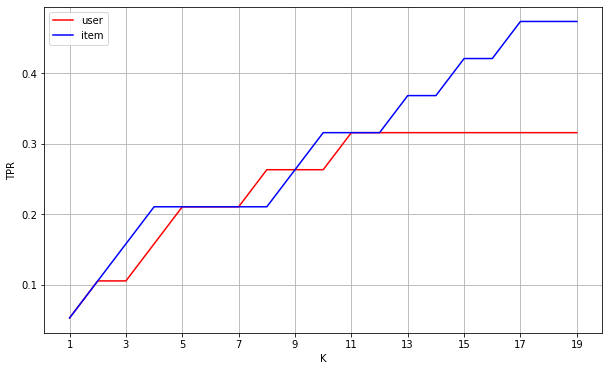

In [91]:
fig = plt.figure(figsize=(10,6))
plt.plot(range(1,20),user_tpr,'r',label='user')
plt.plot(range(1,20),item_tpr,'b',label='item')
plt.xlabel('K')
plt.ylabel('TPR')
plt.grid()
plt.xticks(np.arange(1,20,2))
plt.legend()
plt.show()